# WeatherPy
## Analysis
#### Temperature reaches a maximum as it approaches the equator, and so there is a clear relationship between increasing temperature and proximity to the equator
#### Distribution of humidity around the equator is similar to other latitudes ranging from 20-100
#### Cloudiness, like humidity is spread out among the latitudes and does not display a clear relationship
#### The highest concentration of hotter temperatures appear along the equator

In [114]:
#Import Dependencies
import config
from citipy import citipy

import random
import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

# Get all the samples!

In [115]:
# Collecting a sample of world cities.

# Set Lat & Lon Zones to randomly pick coordinates
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)


# Create a new data frame to hold picked coordinates and city info
cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""

# From each zone, randomly pick 50 unique coordinates and add to dataframe.
for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))
cities_df = cities_df.reset_index(drop=True)
cities_df.shape

(16200, 2)

In [116]:
# For the selected coordinates, use citipy to associate them with nearest city.
cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

# Drop random lat and lon samples from dataframe that don't match coordinates
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df

# Drop duplicate cities 
clean_cities_df = clean_cities_df.drop_duplicates()

# Pick a sample of 500 cities for analysis
select_cities = clean_cities_df.sample(500)
select_cities = select_cities.reset_index(drop=True)

# Hello? OpenWeatherMap? You there?

In [117]:
# Set up values for OpenWeatherMap API calls
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = { "appid" :app_id,"units":"metric" }


In [118]:
def encrypt_key(base_url):
    return base_url[0:53]+config.api_key+base_url[85:]

#GET information from API request and output log
for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    select_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    select_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    select_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    select_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    select_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    select_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))


Retrieving weather information for homer,us
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=homer%2Cus
Retrieving weather information for oriximina,br
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=oriximina%2Cbr
Retrieving weather information for kamarion,gr
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=kamarion%2Cgr
Retrieving weather information for geraldton,au
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=geraldton%2Cau
Retrieving weather information for clyde river,ca
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=clyde+river%2Cca
Retrieving weather information for ceuta,es
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=ceuta%2Ces
Retrieving weather information

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=karaj%2Cir
Retrieving weather information for broome,au
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=broome%2Cau
Retrieving weather information for poros,gr
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=poros%2Cgr
Retrieving weather information for jiehu,cn
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=jiehu%2Ccn
Retrieving weather information for kemi,fi
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=kemi%2Cfi
Retrieving weather information for phuthaditjhaba,za
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=phuthaditjhaba%2Cza
Retrieving weather information for saint george,bm
http://api.openweathermap.org/data/2.5/

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=nigde%2Ctr
Retrieving weather information for pleasant grove,us
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=pleasant+grove%2Cus
Retrieving weather information for berlevag,no
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=berlevag%2Cno
Retrieving weather information for mmathubudukwane,bw
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=mmathubudukwane%2Cbw
Retrieving weather information for silifke,tr
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=silifke%2Ctr
Retrieving weather information for talnakh,ru
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=talnakh%2Cru
Retrieving weather information for chokurdakh,ru
http://

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=victoria%2Csc
Retrieving weather information for garmsar,ir
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=garmsar%2Cir
Retrieving weather information for teguldet,ru
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=teguldet%2Cru
Retrieving weather information for palamos,es
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=palamos%2Ces
Retrieving weather information for sinazongwe,zm
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=sinazongwe%2Czm
Retrieving weather information for bousse,bf
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=bousse%2Cbf
Retrieving weather information for lebanon,us
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=chikwawa%2Cmw
Retrieving weather information for bandarbeyla,so
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=bandarbeyla%2Cso
Retrieving weather information for havoysund,no
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=havoysund%2Cno
Retrieving weather information for fort madison,us
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=fort+madison%2Cus
Retrieving weather information for denison,us
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=denison%2Cus
Retrieving weather information for luangwa,zm
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=luangwa%2Czm
Retrieving weather information for floro,no
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=karpathos%2Cgr
Retrieving weather information for trincomalee,lk
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=trincomalee%2Clk
Retrieving weather information for puerto quijarro,bo
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=puerto+quijarro%2Cbo
Retrieving weather information for obo,cf
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=obo%2Ccf
Retrieving weather information for uhlove,ua
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=uhlove%2Cua
Retrieving weather information for polyarnyy,ru
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=polyarnyy%2Cru
Retrieving weather information for starkville,us
http://api.openwe

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=narasannapeta%2Cin
Retrieving weather information for palmer,us
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=palmer%2Cus
Retrieving weather information for porto novo,cv
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=porto+novo%2Ccv
Retrieving weather information for bardiyah,ly
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=bardiyah%2Cly
Retrieving weather information for haputale,lk
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=haputale%2Clk
Retrieving weather information for uusikaupunki,fi
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=uusikaupunki%2Cfi
Retrieving weather information for werda,bw
http://api.openwea

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=longyearbyen%2Csj
Retrieving weather information for isangel,vu
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=isangel%2Cvu
Retrieving weather information for cookeville,us
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=cookeville%2Cus
Retrieving weather information for hami,cn
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=hami%2Ccn
Retrieving weather information for fereydunshahr,ir
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=fereydunshahr%2Cir
Retrieving weather information for taltal,cl
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=taltal%2Ccl
Retrieving weather information for woodward,us
http://api.openweatherma

http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=san+patricio%2Cmx
Retrieving weather information for hoopstad,za
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=hoopstad%2Cza
Retrieving weather information for po,bf
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=po%2Cbf
Retrieving weather information for jamestown,sh
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=jamestown%2Csh
Retrieving weather information for maryborough,au
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=maryborough%2Cau
Retrieving weather information for binga,cd
http://api.openweathermap.org/data/2.5/weather?appid=e2cadc4738a07b7a733b584b14473c3b&units=metric&q=binga%2Ccd
Retrieving weather information for belaya gora,ru
http://api.openweathermap.org/d

In [119]:
# Drop cities with missing information
select_cities = select_cities.dropna()
#Export to csv file
select_cities.to_csv("city_weather_data.csv")

In [120]:
# Plot settings
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

# Temperature versus Latitude

In [121]:
# Temperature vs Latitude 
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature")

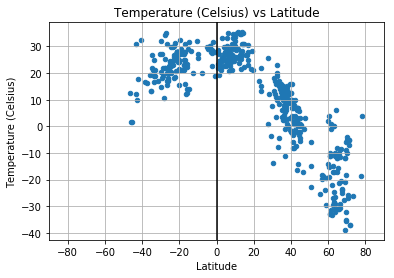

In [122]:
#Set Latitude range at -90,90
#Create bold axis line at 0 Latitude
#Save figure as png
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black')
plt.savefig("Temperature vs Latitude")
plt.show()



# Humidity and Latitude

In [123]:
# Humidity vs Latitude 
selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True)

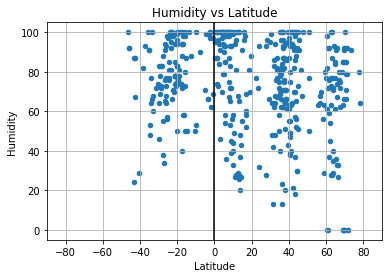

In [124]:
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black')
plt.savefig("Humidity vs Latitude")
plt.show()

# Windspeed with Latitude

In [125]:
# Wind speed vs Latitude
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True)

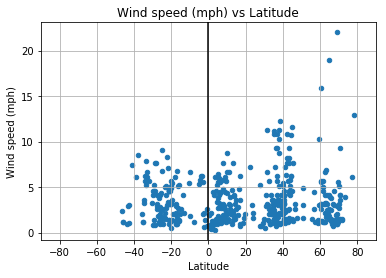

In [126]:
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black')
plt.savefig("Wind Speed vs Latitude")
plt.show()

# Cloudiness with Latitude

In [127]:
# Cloudiness vs Latitude
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True)

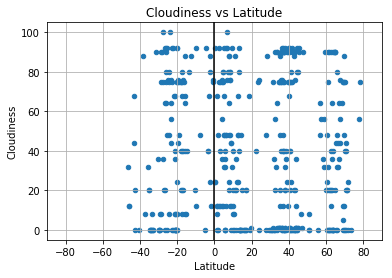

In [128]:
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black')
plt.savefig("Cloudiness vs Latitude")
plt.show()

# Temperature with Latitude and Longitude

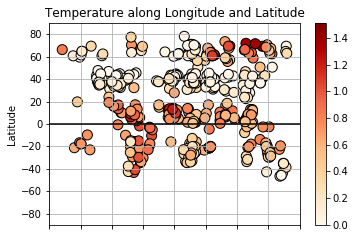

In [129]:
# Temperature approaching equator
size_temp = np.round((((selected_cities.Temperature)/100)**2)*10,2)

selected_cities.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor='black', 
                     c=size_temp,s=100,cmap=plt.cm.OrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-90,90])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black')
plt.savefig("Temperature along Longitude and Latitude")

plt.show()